In [95]:
!pip install sklearn
!pip install matplotlib
!pip install numpy, seaborn, plotly

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Invalid requirement: 'numpy,'


In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [97]:

from sklearn.linear_model import LinearRegression

In [98]:
x = np.array([2,4,5,3,6,5,7])
y = np.array([34,60,20,50,50,55,60])
x



array([2, 4, 5, 3, 6, 5, 7])

In [99]:
y

array([34, 60, 20, 50, 50, 55, 60])

# Create **DataFrame**

In [100]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,2,34
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [101]:
X = df[['x']]
y = df['y']

# **Using sklearn to perform linear regression**

In [102]:
model = LinearRegression().fit(X, y) #training model

In [103]:
slope_sklearn = model.coef_
slope_sklearn

array([2.76612903])

In [104]:
intercept_sklearn = model.intercept_
intercept_sklearn

34.354838709677416

# Manual calculations using Formula 1

In [105]:
mean_x = np.mean(x)
mean_y = np.mean(y)
slope_formula = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
intercept_formula = mean_y - slope_formula * mean_x

# Formula2

In [106]:

N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

slope_formula2 = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
intercept_formula2 = (sum_y - slope_formula2 * sum_x) / N  # Corrected line


# Let's Compare the Results

In [107]:
#sklearn
(slope_sklearn, intercept_sklearn)

(array([2.76612903]), 34.354838709677416)

In [108]:
#formula1
(slope_formula, intercept_formula)

(2.7661290322580645, 34.35483870967742)

In [109]:
#formula2
(slope_formula2, intercept_formula2)

(2.7661290322580645, 34.35483870967742)

# Prediction

In [110]:
pred = model.predict(df[['x']])
pred

array([39.88709677, 45.41935484, 48.18548387, 42.65322581, 50.9516129 ,
       48.18548387, 53.71774194])

In [111]:
df.head()

,x,y
0,2,34
1,4,60
2,5,20
3,3,50
4,6,50


In [112]:
df['pred'] = model.predict(df[['x']])
df.head()

,x,y,pred
0,2,34,39.887097
1,4,60,45.419355
2,5,20,48.185484
3,3,50,42.653226
4,6,50,50.951613


Text(0.5, 1.0, 'Weight and Price ratio of vegetable')

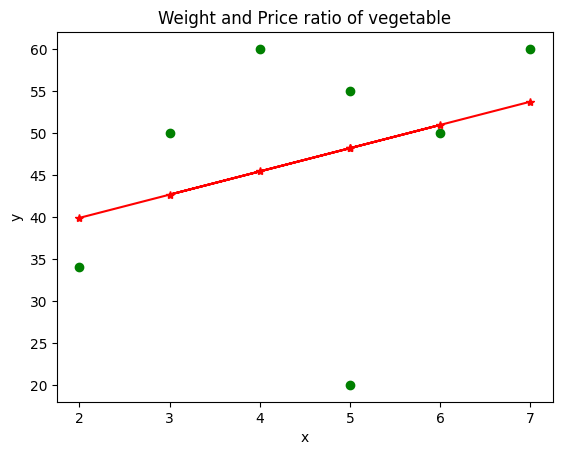

In [113]:
plt.plot(df[['x']], model.predict(df[['x']]), marker='*', color='red') #best fit line
plt.scatter(df['x'] , df['y'], color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weight and Price ratio of vegetable')

In [114]:
x

array([2, 4, 5, 3, 6, 5, 7])

In [115]:
y

0    34
1    60
2    20
3    50
4    50
5    55
6    60
Name: y, dtype: int64

In [116]:
df1 = pd.DataFrame({'Weight': x, 'Price': y})
df1

,Weight,Price
0,2,34
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [117]:
p = model.predict(df[['x']])
p

array([39.88709677, 45.41935484, 48.18548387, 42.65322581, 50.9516129 ,
       48.18548387, 53.71774194])

In [118]:
df

,x,y,pred
0,2,34,39.887097
1,4,60,45.419355
2,5,20,48.185484
3,3,50,42.653226
4,6,50,50.951613
5,5,55,48.185484
6,7,60,53.717742


# MSE

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [120]:
mse = mean_squared_error(df['x'], df['y']) # actural y, predicted y
mse

1977.0

In [121]:
mae = mean_absolute_error(df['x'], df['y']) # actural y, predicted y
mae

42.42857142857143

# Residual Calculation

In [122]:
#adding new column in df named Residuals
df['Residuals'] = df['y'] - df['pred']
df

,x,y,pred,Residuals
0,2,34,39.887097,-5.887097
1,4,60,45.419355,14.580645
2,5,20,48.185484,-28.185484
3,3,50,42.653226,7.346774
4,6,50,50.951613,-0.951613
5,5,55,48.185484,6.814516
6,7,60,53.717742,6.282258


# Calculate L1 Loss

In [123]:
L1_loss = df['Residuals'].abs().sum()
L1_loss

70.04838709677418

# Calculate L2 Loss

In [124]:
L2_loss = (df['Residuals']**2).sum()
L2_loss

1182.4596774193549

In [125]:
df



,x,y,pred,Residuals
0,2,34,39.887097,-5.887097
1,4,60,45.419355,14.580645
2,5,20,48.185484,-28.185484
3,3,50,42.653226,7.346774
4,6,50,50.951613,-0.951613
5,5,55,48.185484,6.814516
6,7,60,53.717742,6.282258


In [127]:
print(f"L1 Loss = {L1_loss}, L2 Loss = {L2_loss}")

L1 Loss = 70.04838709677418, L2 Loss = 1182.4596774193549


In [126]:
print(f"L1 Loss = {L1_loss:.2f}, L2 Loss = {L2_loss:.2f}") #2 DIGIT after dot.

L1 Loss = 70.05, L2 Loss = 1182.46
